# Faltung und Korrelationsfunktionen

Klasse zum Laden und Plotten der entsprechenden Faltungen und Korrelationsfunktionen

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

class Faltung:
    def __init__(self,path) -> None:
        self.x, self.func1, self.func2, self.conv = np.loadtxt(path,usecols=(0,1,2,3)).T
        
    def plot(self, fwhm=True, xlim=[(75.0,125.0),(75.0,125.0),(75.0,125.0)]):
        '''Plot der Funktionen und Faltungen. Es kann eine Liste mit 
        entsprechenden x-Achsenabschnitten als Tupel übergeben werden.
        Mit fwhm wird gesagt, ob diese berechnet und eingezeichnet werden 
        sollen.'''
        fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(6,10))

        ax1.plot(self.x,self.func1)
        ax1.set_title('Funktion 1')
        ax2.plot(self.x,self.func2)
        ax2.set_title('Funktion 2')
        ax3.plot(self.x,self.conv)
        ax3.set_title('Faltung')

        if fwhm == True:
            self.fwhm()

        for i, ax in enumerate((ax1,ax2,ax3)):
            ax.set_xlim(xlim[i])
            if fwhm == True:
                ax.hlines(self.half_max[i],self.x1[i],self.x2[i],label='FWHM = '+str(self.fwhm[i]),color='red')
                ax.legend()

    def fwhm(self):
        '''Berechnung der FWHM der drei Funktionen. Für die entsprechenden x-Werte werden
        die Datenpunkte über der halben höhe gewählt, da nicht sichergestellt werden kann,
        dass die halbe Höhe als Datenpunkt vorliegt. Die FWHM's, Indizes und halben Höhen 
        liegen nachher als Liste vor.'''
        funcs = (self.func1,self.func2,self.conv)
        self.fwhm = []
        self.half_max = []
        self.x1 = []
        self.x2 = []
        for f in funcs:
            half_max = 0.5 * np.max(f)
            self.half_max.append(half_max)
            i = 0
            ayuda = False
            '''Fallunterscheidung: Wird half_max getroffen wird der entsprechende
            x-Wert am Index genutzt. Wenn nicht, wird linear interpoliert.'''
            while ayuda == False:
                if f[i] == half_max:
                    ayuda = True
                    self.x1.append(self.x[i])
                elif f[i] >= half_max:
                    ayuda = True
                    m, b, r, p, se = linregress([self.x[i-1],self.x[i]],[f[i-1],f[i]])
                    new_x = (half_max-b)/m
                    self.x1.append(new_x)
                i += 1
            ayuda = False
            while ayuda == False:
                if f[i] == half_max:
                    ayuda = True
                    self.x2.append(self.x[i])
                elif f[i] <= half_max:
                    ayuda = True
                    m, b, r, p, se = linregress([self.x[i-1],self.x[i]],[f[i-1],f[i]])
                    new_x = (half_max-b)/m
                    self.x2.append(new_x)
                i += 1
            self.fwhm.append(round(abs(self.x2[-1] - self.x1[-1]),3))



Darstellung der Faltungen zweier Gaußfunktionen:

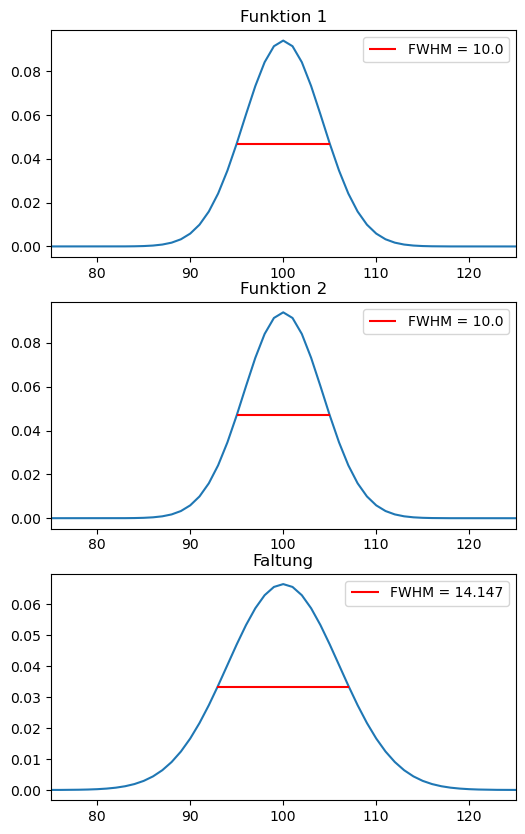

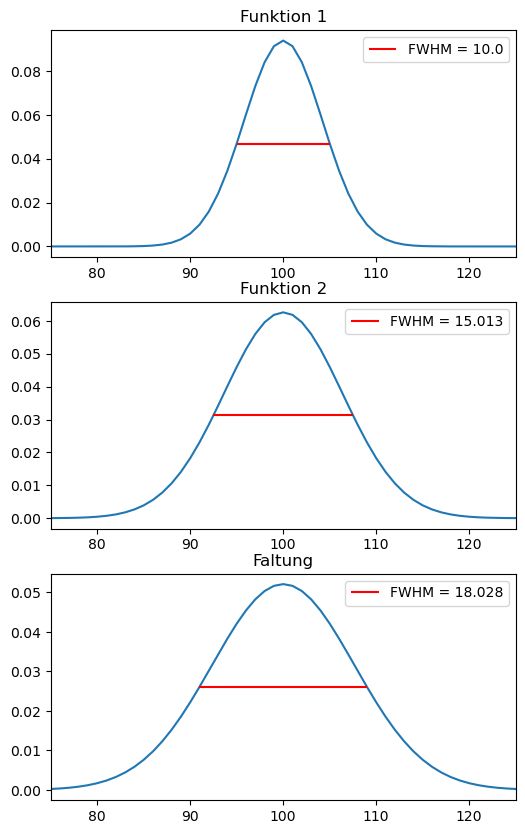

In [93]:
gauß10 = Faltung('5/51a/gauss_10_10.conv')
gauß10.plot()
plt.savefig('figures/gauss10.pdf')

gauß15 = Faltung('5/51a/gauss_10_15.conv')
gauß15.plot()
plt.savefig('figures/gauss15.pdf')

Darstellung der Faltungen zweier Lorentz-Funktionen:

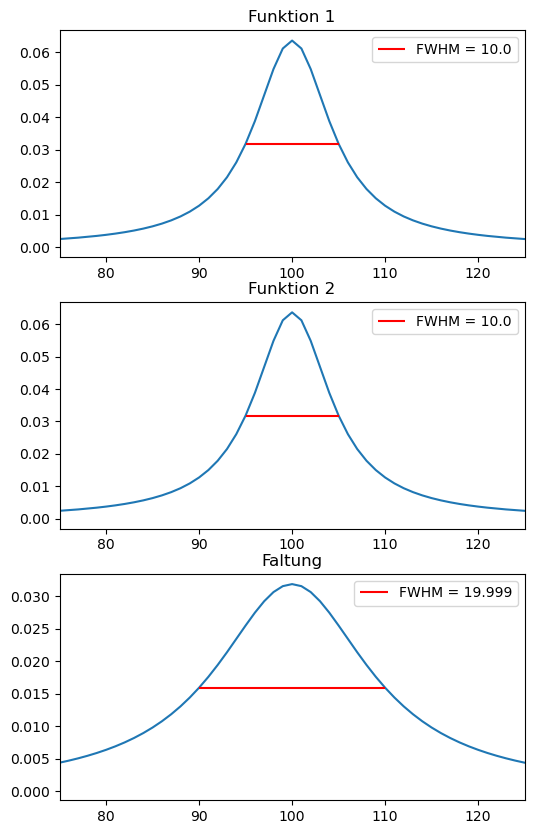

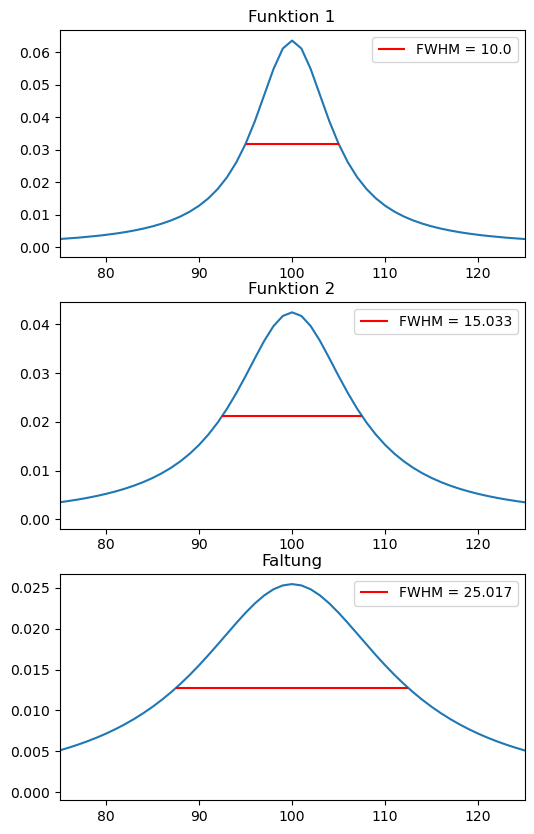

In [94]:
lorentz10 = Faltung('5/51a/lorentz_10_10.conv')
lorentz10.plot()
plt.savefig('figures/lorentz10.pdf')

lorentz15 = Faltung('5/51a/lorentz_10_15.conv')
lorentz15.plot()
plt.savefig('figures/lorentz15.pdf')

Klasse zum Laden der Korrelationsfunktionen:

In [95]:
class Korrelation:
    def __init__(self,path) -> None:
        self.x, self.ac1, self.ac2, self.ccf = np.loadtxt(path,usecols=(0,1,2,3)).T
        
    def plot(self, xlim=None, title=None):
        '''Plot der Funktionen und Faltungen. Es kann eine Liste mit 
        entsprechenden x-Achsenabschnitten als Tupel übergeben werden.'''
        fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(6,10),sharex=True)
        fig.suptitle(title)

        ax1.plot(self.x,self.ac1)
        ax1.set_xlim(xlim)
        ax1.set_title('Autokorrelationsfunktion 1')
        # ax1.set_xlabel(r'$\tau$ in willkürlichen Einheiten')
        ax1.set_ylabel('ACF 1')
        ax2.plot(self.x,self.ac2)
        ax2.set_xlim(xlim)
        ax2.set_title('Autokorrelationsfunktion 2')
        # ax2.set_xlabel(r'$\tau$ in willkürlichen Einheiten')
        ax2.set_ylabel('ACF 2')
        ax3.plot(self.x,self.ccf)
        ax3.set_xlim(xlim)
        ax3.set_title('Kreuzkorrelationsfunktion')
        ax3.set_xlabel(r'$\tau$ in willkürlichen Einheiten')
        ax3.set_ylabel('CCF')

Korrelation von Rauschsignalen:

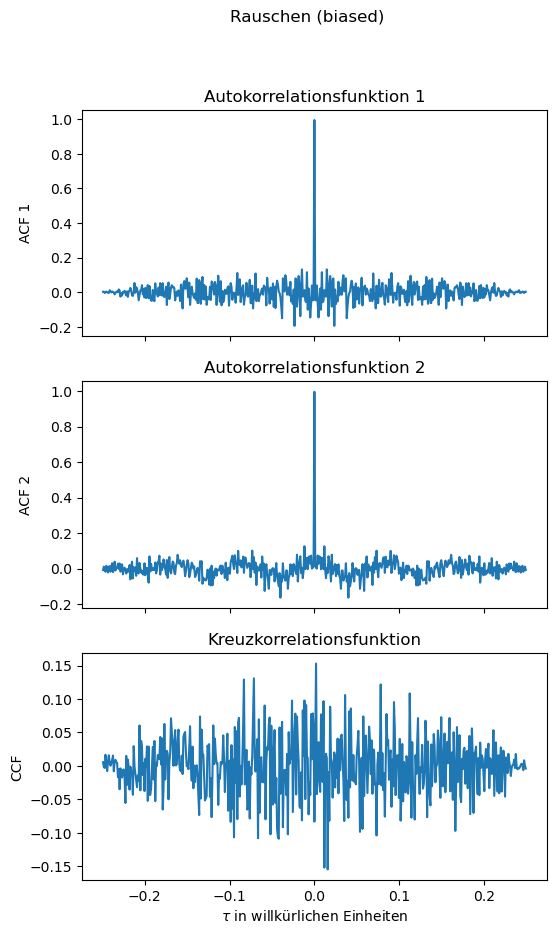

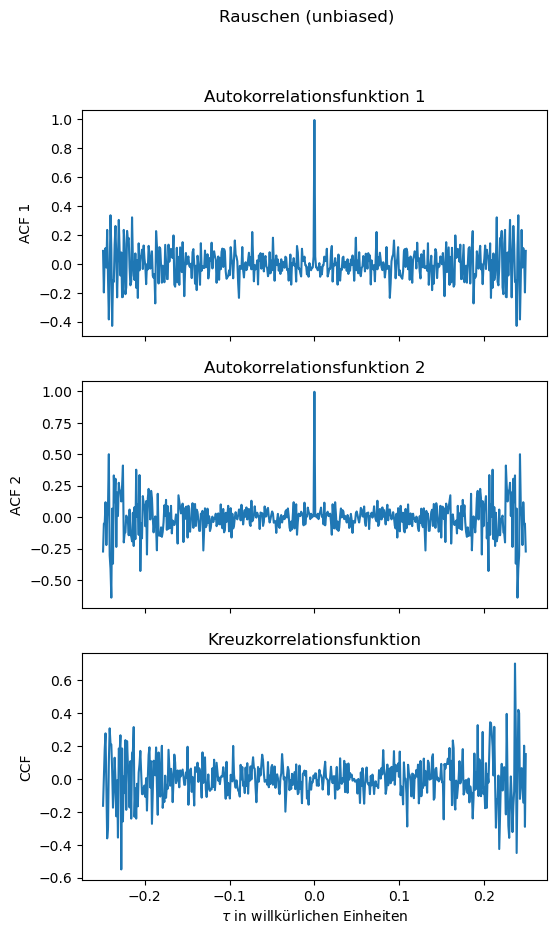

In [96]:
rausch_bi = Korrelation('5/52/rausch_bi.cf')
rausch_bi.plot(title='Rauschen (biased)')
plt.savefig('figures/rauschen_bi.pdf')

rausch_un = Korrelation('5/52/rausch_un.cf')
rausch_un.plot(title='Rauschen (unbiased)')
plt.savefig('figures/rauschen_un.pdf')

Korrelation von Sinus-Signalen:

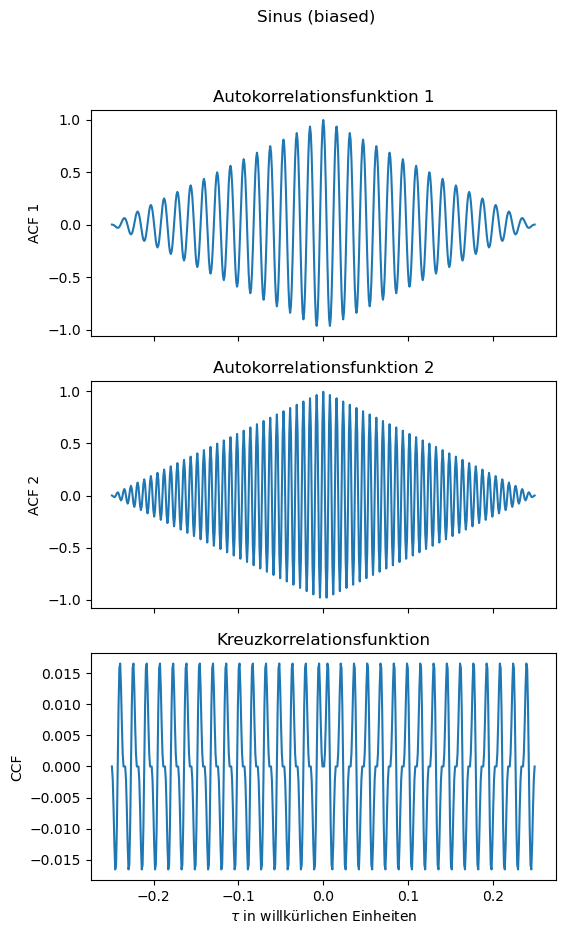

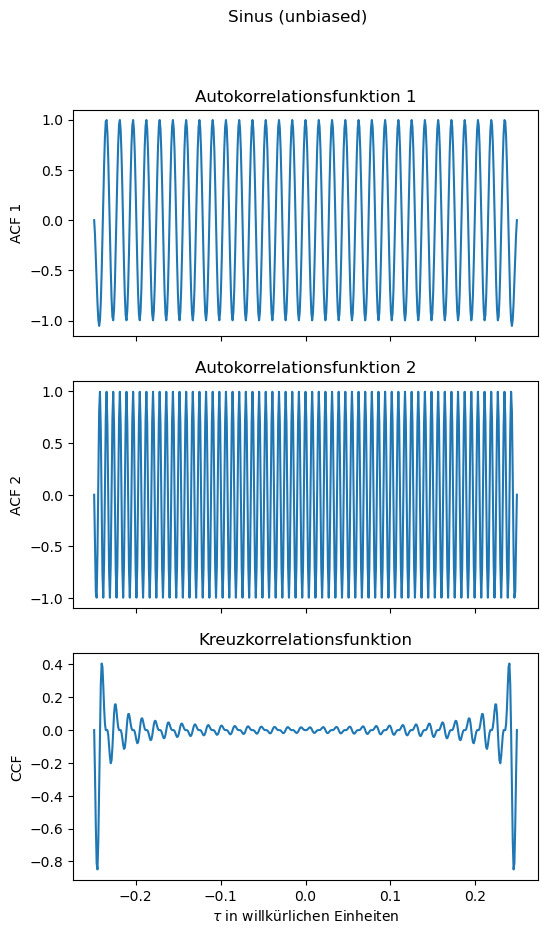

In [97]:
sin_bi = Korrelation('5/52/sin_bi.cf')
sin_bi.plot(title='Sinus (biased)')
plt.savefig('figures/sin_bi.pdf')

sin_un = Korrelation('5/52/sin_un.cf')
sin_un.plot(title='Sinus (unbiased)')
plt.savefig('figures/sin_un.pdf')